In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn
from collections import OrderedDict
from time import time
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import fmin_powell
from scipy import integrate

import theano as thno
import theano.tensor as T
data = pd.read_stata('E:/PhD 1st year/2-3 Paper2/R/practice1017_3.dta')

In [11]:
with pm.Model() as model:
    # Define priors
    intercept0 = pm.Normal('intercept0', 0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    a0 = pm.Normal('a0', 0, sd=20)
    a1 = pm.Normal('a1', 0, sd=20)
    a2 = pm.Normal('a2', 0, sd=20)
    a3 = pm.Normal('a3', 0, sd=20)
    a4 = pm.Normal('a4', 0, sd=20)
    a5 = pm.Normal('a5', 0, sd=20)
    a6 = pm.Normal('a6', 0, sd=20)
    a7 = pm.Normal('a7', 0, sd=20)
    a8 = pm.Normal('a8', 0, sd=20)
    a9 = pm.Normal('a9', 0, sd=20)
    a10 = pm.Normal('a10', 0, sd=20)
    a11 = pm.Normal('a11', 0, sd=20)
    a12 = pm.Normal('a12', 0, sd=20)
    a13 = pm.Normal('a13', 0, sd=20) 

    time_est = intercept0+a0*data['sex']+a1*data['agec2']+a2*data['agecsq2']+a3*data['agerank2'] + a4*data['ruralurban2']+a5*data['income2']+a6*data['land2']+a7*data['numsibling2']+ a8*data['socialgroup0'] +a9*data['socialgroup1']+a10*data['socialgroup2']+a11*data['socialgroup3']+a12*data['socialgroup4']+a13*data['socialgroup5'] 
    
    
    # Define likelihood
    y= pm.Normal('y', mu=time_est, sd=sigma, observed=data['total_hours2'])          
    trace = pm.sample(80000, tune=10000, cores=2, init=None)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a13, a12, a11, a10, a9, a8, a7, a6, a5, a4, a3, a2, a1, a0, sigma, intercept0]
Sampling 2 chains:  18%|████████▏                                    | 32700/180000 [45:45:34<188:23:33,  4.60s/draws]
The number of effective samples is smaller than 25% for some parameters.


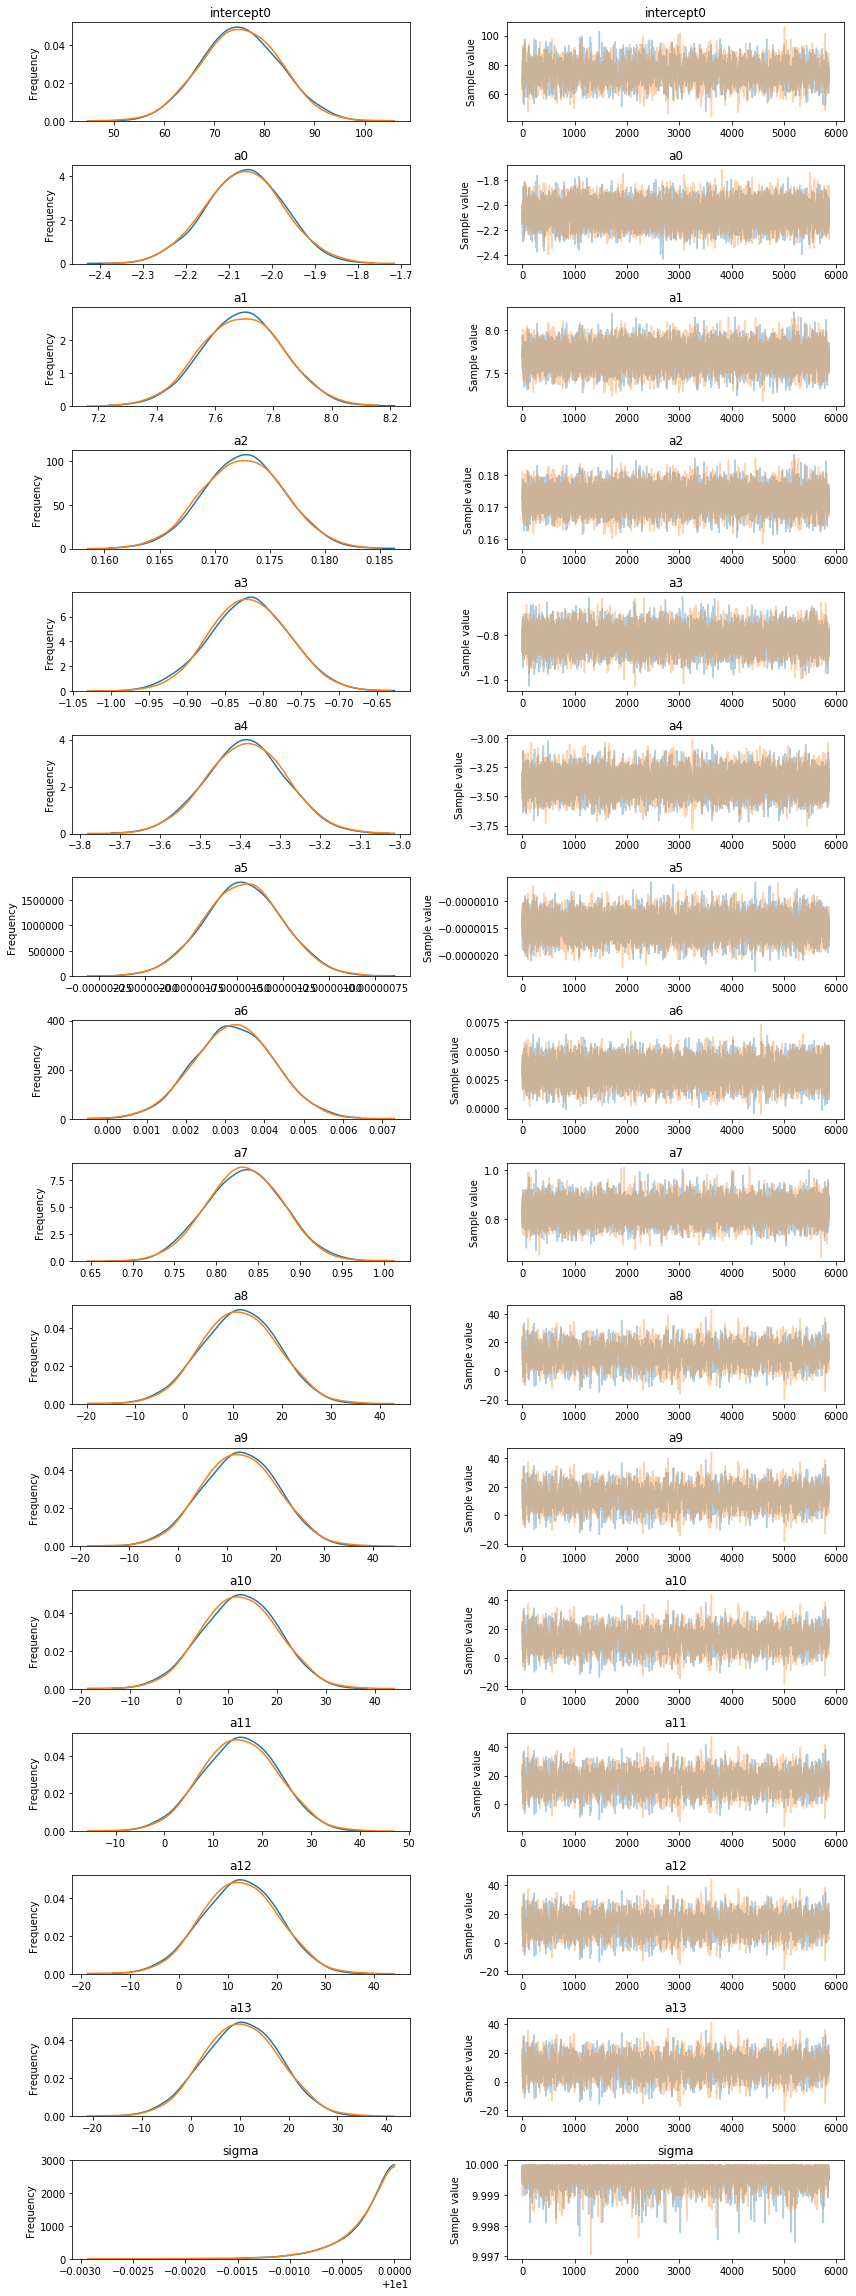

In [13]:
pm.traceplot(trace)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD563F7940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001AD5B0AFC50>]], dtype=object)

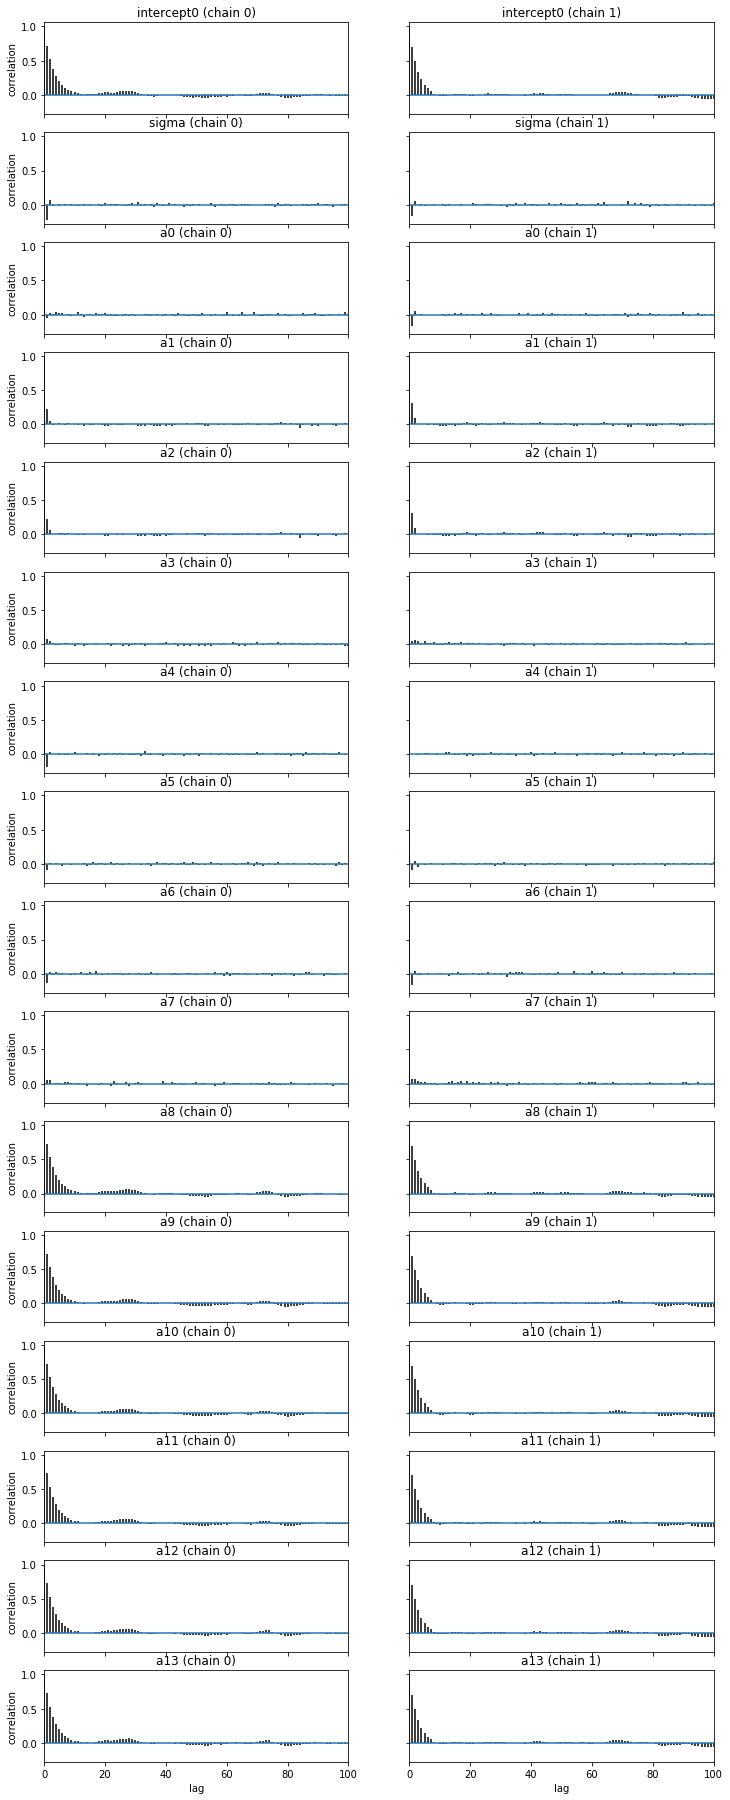

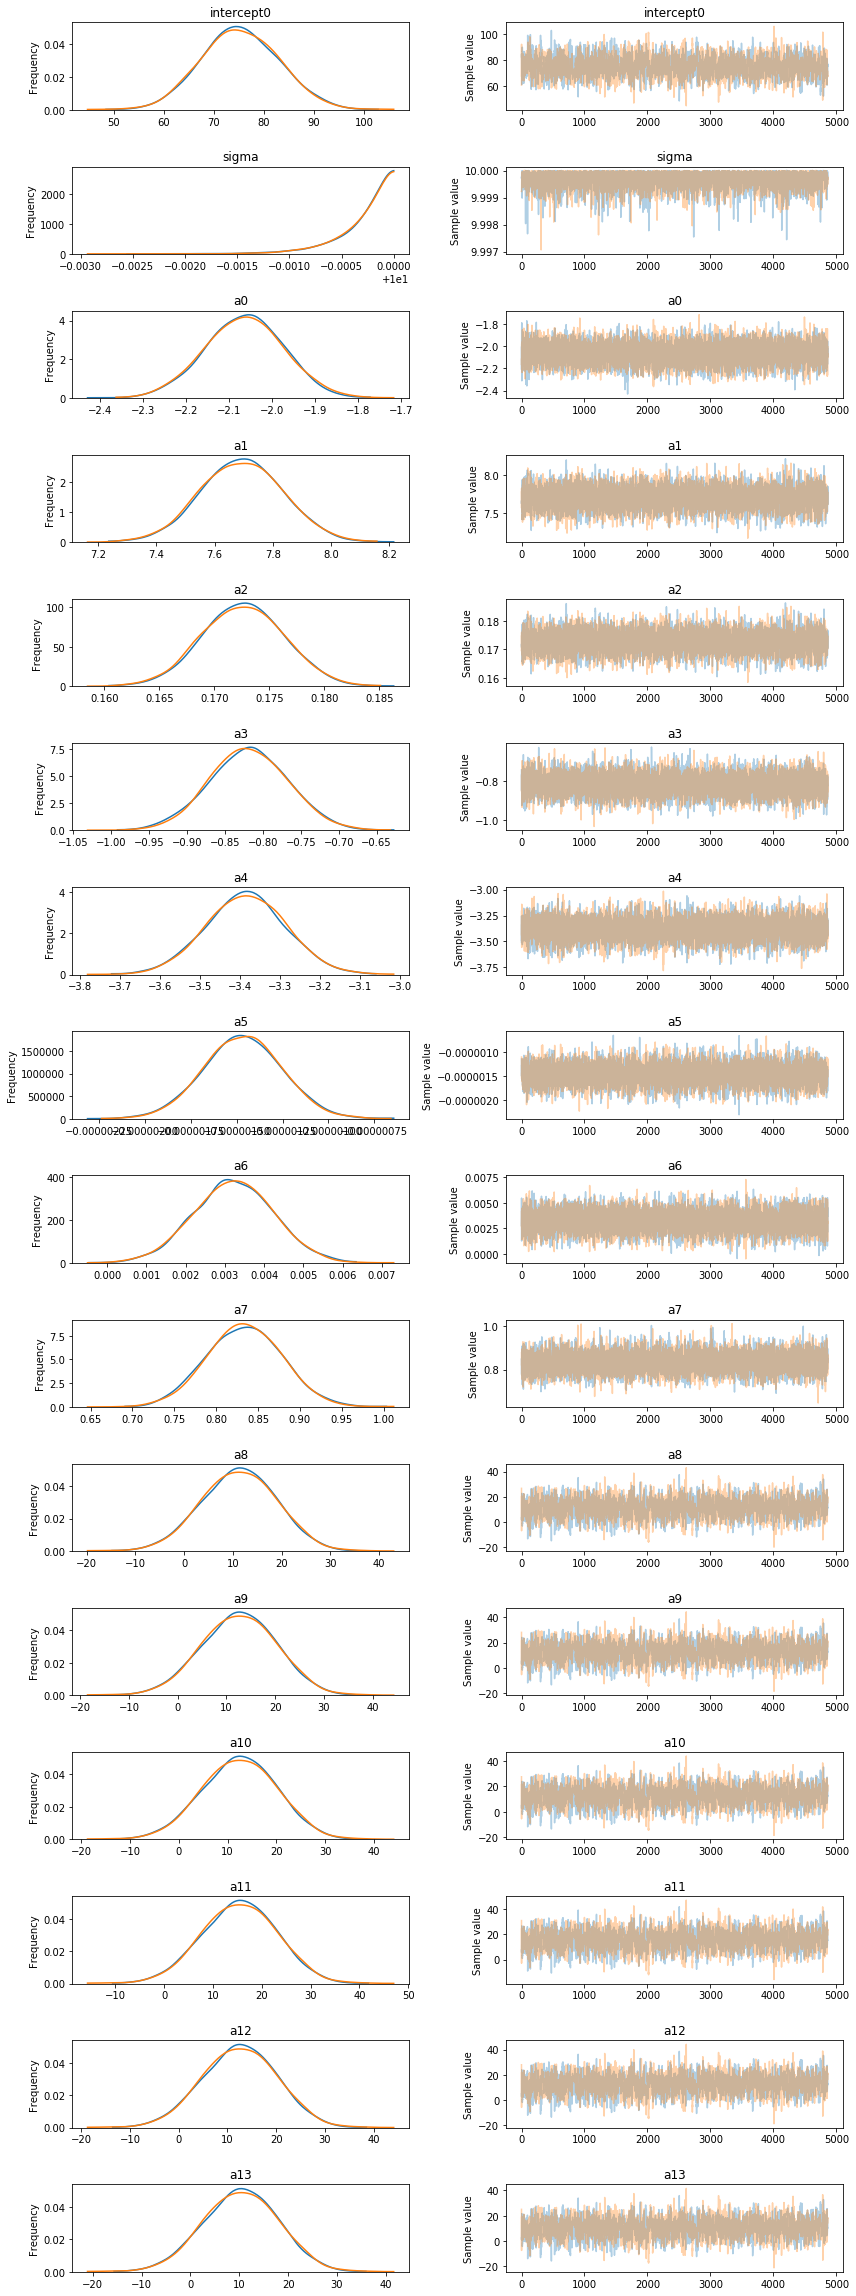

In [17]:
t = trace[1000:]
t['a1'].shape
p = trace.get_values('a0', burn=1000, combine=True, chains=[0,1], thin=10)
p.shape
pm.autocorrplot(t, varnames=['intercept0','sigma', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6','a7' ,'a8','a9','a10','a11','a12','a13'])
pm.traceplot(t, varnames=['intercept0', 'sigma', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6','a7' ,'a8','a9','a10','a11','a12','a13'])

In [1]:
t = trace[1000:]
t['a1'].shape
p = trace.get_values('a0', burn=1000, combine=True, chains=[0,1], thin=10)
p.shape
pm.autocorrplot(t, varnames=['intercept0','sigma', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6','a7' ,'a8','a9','a10','a11','a12','a13'])
pm.traceplot(t, varnames=['intercept0', 'sigma', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6','a7' ,'a8','a9','a10','a11','a12','a13'])

NameError: name 'trace' is not defined